来源：https://zhuanlan.zhihu.com/p/101284491

In [1]:
import pandas as pd
import numpy as np

In [11]:
company=["A","B","C"]

data=pd.DataFrame({
    "company":[company[x] for x in np.random.randint(0,len(company),10)],
    "salary":np.random.randint(5,50,10),
    "age":np.random.randint(15,50,10)
}
)
data

,company,salary,age
0,B,5,21
1,A,29,15
2,C,26,48
3,B,17,42
4,B,29,17
5,B,40,26
6,A,41,19
7,A,14,19
8,A,33,33
9,B,5,22


## group操作

In [12]:
group = data.groupby("company")
group

In [13]:
list(group)

[('A',
    company  salary  age
  1       A      29   15
  6       A      41   19
  7       A      14   19
  8       A      33   33),
 ('B',
    company  salary  age
  0       B       5   21
  3       B      17   42
  4       B      29   17
  5       B      40   26
  9       B       5   22),
 ('C',
    company  salary  age
  2       C      26   48)]

## agg操作
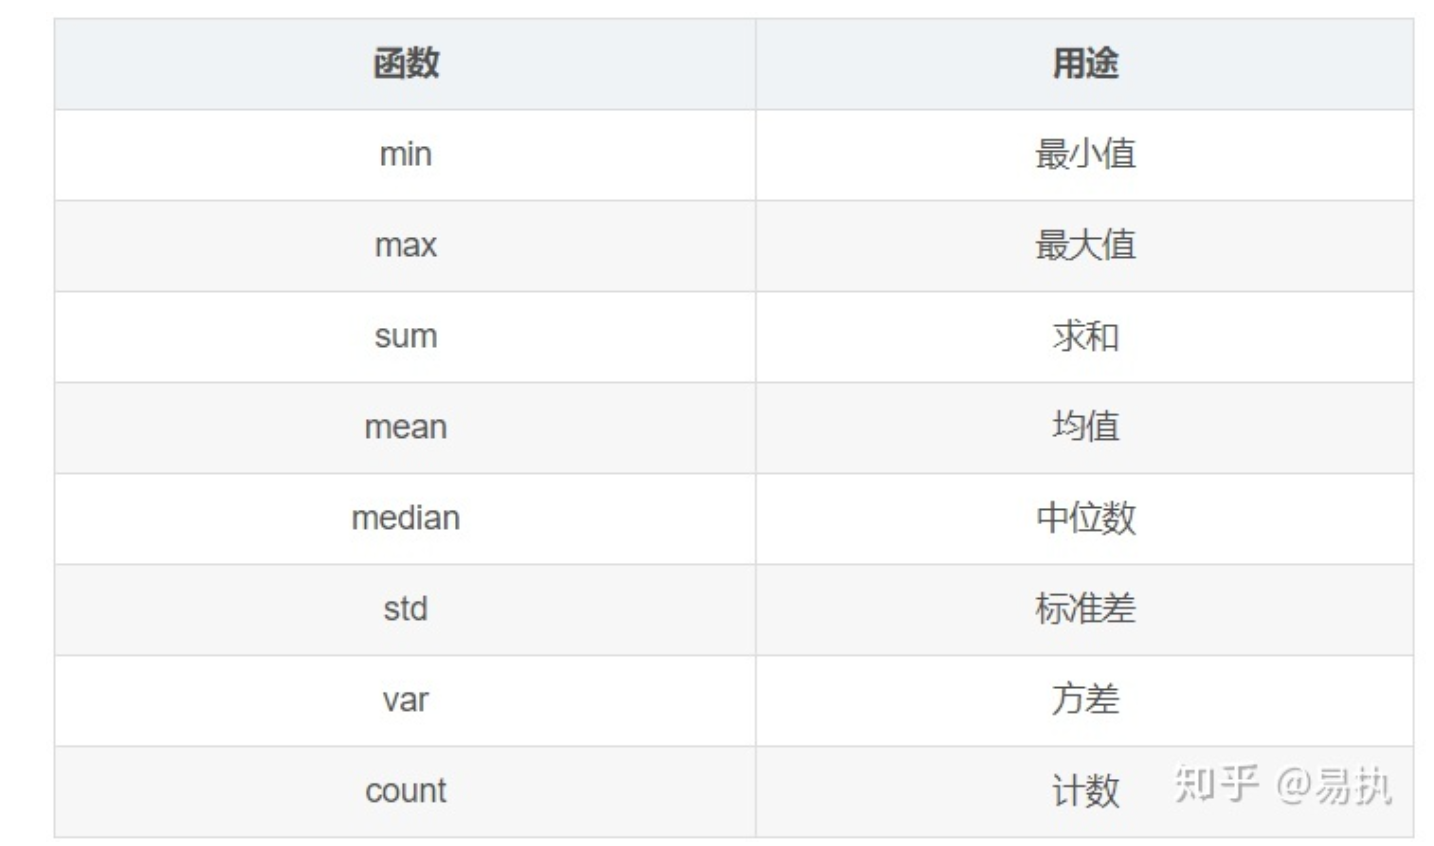

In [14]:
data.groupby("company").agg('mean')

,salary,age
company,,
A,29.25,21.5
B,19.20,25.6
C,26.00,48.0


In [15]:
data.groupby("company").agg({'salary':'median','age':'mean'})


,salary,age
company,,
A,31,21.5
B,17,25.6
C,26,48.0


## transform
新增一列让相同公司的员工具有一样的薪水

In [22]:
avg_salary_dict = data.groupby('company')['salary'].mean().to_dict()
data['avg_salary'] = data['company'].map(avg_salary_dict)
data

,company,salary,age,avg_salary
0,B,5,21,19.20
1,A,29,15,29.25
2,C,26,48,26.00
3,B,17,42,19.20
4,B,29,17,19.20
5,B,40,26,19.20
6,A,41,19,29.25
7,A,14,19,29.25
8,A,33,33,29.25
9,B,5,22,19.20


In [25]:
# 得到的结果会按照原索引的顺序返回
data['avg_salary'] = data.groupby('company')['salary'].transform('mean')
data

,company,salary,age,avg_salary
0,B,5,21,19.20
1,A,29,15,29.25
2,C,26,48,26.00
3,B,17,42,19.20
4,B,29,17,19.20
5,B,40,26,19.20
6,A,41,19,29.25
7,A,14,19,29.25
8,A,33,33,29.25
9,B,5,22,19.20


### 获取每个公司年龄最大的员工的数据

In [26]:
def get_older_staff(x):
    df = x.sort_values(by='age',ascending=True)
    return df.iloc[-1:]

In [34]:
oldest_staff = data.groupby ('company',as_index=False).apply(get_older_staff)
oldest_staff

,,company,salary,age,avg_salary
0,8,A,33,33,29.25
1,3,B,17,42,19.20
2,2,C,26,48,26.00
